# PHYS 434 HW2 Angela Zhou

In [1]:
# import the libraries
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib.pyplot import xticks
import scipy
from scipy import stats

### 1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

In [2]:
sides = 6

# Calculate the probability of thowing two ones
p_twoOnes = (1/sides) * (1/sides)

# Calculate the probability of thowing sevens
p_sevens = ((1/sides) * (1/sides))*2 + ((1/sides) * (1/sides)) * 2 + ((1/sides) * (1/sides)) * 2 # p(1&6, 6&1) + p(2&5, 5&2) + p(3&4, 4&3)

# ratio between two probabilities
ratio = p_twoOnes / p_sevens

# print out the results
print("The probability of throwing two ones when rolling 2 six-sided dice is " + str(p_twoOnes))
print("The probability of throwing sevens when rolling 2 six-sided dice is " + str(p_sevens))
print("The ratio between two probabilities above is " + str(ratio))
print("It is more probable to throw sevens when rolling 2 six-sided dice.")

The probability of throwing two ones when rolling 2 six-sided dice is 0.027777777777777776
The probability of throwing sevens when rolling 2 six-sided dice is 0.16666666666666666
The ratio between two probabilities above is 0.16666666666666666
It is more probable to throw sevens when rolling 2 six-sided dice.


### 2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram). 

We can determine the probability of the sum of 2 six sided dice using the mathematical formula below. <br>
$P_{sumofTwoThrows}(sum) = \int P_{firstThrow}(x)P_{secondThrow}(sum-x)dx = P_{firstThrow}(sum) * P_{secondThrow}(sum)$ <br>
The code below calculates the probability of the sum of 2 six sided dice analytically.

In [30]:
# determine the probability of the sum of 2 six sided dice analytically
sides = 6
def prob_sum_2Throws(sum): # function that returns the probability of the sum of 2 six sided dice. Parameter: value of sum
    
    p_sum = 0
    for i in range(1,math.floor(sum/2)+1): # +1 because for loop doesn't take the higher limit into account
        if (sum - i < 7 and i != sum-i): # we made sure the value for first throw is between 1-6, need to make sure the second throw is between 1-6 as well
            p_sum = p_sum + ((1/sides)*(1/sides)) * 2
        elif (sum - i < 7):
            p_sum = p_sum + ((1/sides)*(1/sides))
    
    return p_sum

In [4]:
# Make a distribution of probability of the sum of 2 six sided dice
sums = np.empty(11)
p_sumsofTwoThrows = np.empty(11) # create an empty np array with size 11 because possible sums are numbers from 2-12
for i in range(2,13): # looping through all possible sums
    sums[i-2] = i
    p_sumsofTwoThrows[i-2] = prob_sum_2Throws(i)

# print out the results
for i in range(11):
    print("The probability of the sum of 2 six-sided dice to be " + str(sums[i]) + " = " + str(p_sumsofTwoThrows[i]))

The probability of the sum of 2 six-sided dice to be 2.0 = 0.027777777777777776
The probability of the sum of 2 six-sided dice to be 3.0 = 0.05555555555555555
The probability of the sum of 2 six-sided dice to be 4.0 = 0.08333333333333333
The probability of the sum of 2 six-sided dice to be 5.0 = 0.1111111111111111
The probability of the sum of 2 six-sided dice to be 6.0 = 0.1388888888888889
The probability of the sum of 2 six-sided dice to be 7.0 = 0.16666666666666666
The probability of the sum of 2 six-sided dice to be 8.0 = 0.1388888888888889
The probability of the sum of 2 six-sided dice to be 9.0 = 0.1111111111111111
The probability of the sum of 2 six-sided dice to be 10.0 = 0.08333333333333333
The probability of the sum of 2 six-sided dice to be 11.0 = 0.05555555555555555
The probability of the sum of 2 six-sided dice to be 12.0 = 0.027777777777777776


The cell below calculates the probability of the sum of 2 six sided dice numerically using np.convolve().

In [5]:
# determine the probability of the sum of 2 six sided dice numerically

sides = 6
# define two arrays that contain the probability of throwing each value from 1-6
dice1 = np.array([1/sides, 1/sides, 1/sides, 1/sides, 1/sides, 1/sides])
dice2 = np.array([1/sides, 1/sides, 1/sides, 1/sides, 1/sides, 1/sides])
# perform convolution on the two arrays above
p_sum_2Throws = np.convolve(dice1, dice2)

# print out the result
print("The probability of the sum of 2 six-sided dice is")
print(p_sum_2Throws)

The probability of the sum of 2 six-sided dice is
[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


From the outputs above we can see the probabilities we calculated analytically match with the probabilites we calculated numerically.
Also, the probability of the sum of 2 six-sided dices to be 7 is 0.16666667 which matches to our result in part 1.

### 3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

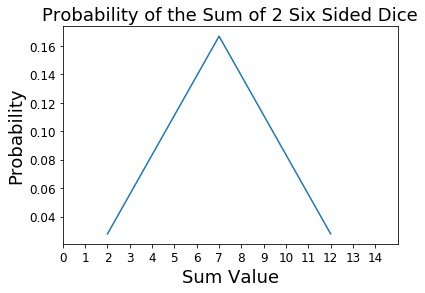

In [6]:
# Plot the distribution above in a histogram
fig, ax = plt.subplots(1, 1) # create a figure
ax.plot(sums, p_sumsofTwoThrows) # fill the figure with the distribution
plt.tick_params(labelsize = 12) # sets tick parameter for the plot, in this case, the label size
locs, labels = xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 15, step=1))  # Set label locations.
plt.xlim([0,15]) # sets rage for x axis
ax.set_xlabel("Sum Value",fontsize = 18)
ax.set_ylabel("Probability", fontsize = 18)
plt.title("Probability of the Sum of 2 Six Sided Dice", fontsize = 18)
plt.show()

In [32]:
# Now using the np array to calculate the mean and variance of the distribution
mean = np.mean(sums)
var = np.sum(sums**2*p_sumsofTwoThrows) - mean**2

# print out the results
print("The mean of the distribution is " + str(mean))
print("The variance of the distribution is " + str(var))

The mean of the distribution is 7.0
The variance of the distribution is 5.833333333333336


### 4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [9]:
sides = 6

# create an array to store all possible sum values
sums_10Dices = np.linspace(10,60,51)

# create two arrays contain the probability of throwing each value of dice (1-6) for the first convolution
dice1 = np.array([1/sides, 1/sides, 1/sides, 1/sides, 1/sides, 1/sides])
dice2 = np.array([1/sides, 1/sides, 1/sides, 1/sides, 1/sides, 1/sides])

for i in range(9): # convolve 9 times for 10 dices, convolve once = rolling two dices
    p_sum_10Dices = np.convolve(dice1, dice2)
    dice1 = p_sum_10Dices # after the first convolution, convolve the result from the previous one with a new dice

# print out the results make sure everything looks good
print("All possible values for the sum of throwing 10 six-sided dice are:")
print(sums_10Dices)
print()
print("The probabilities correspond to sums in the first array by indices are: ")
print(p_sum_10Dices)

All possible values for the sum of throwing 10 six-sided dice are:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.]

The probabilities correspond to sums in the first array by indices are: 
[1.65381717e-08 1.65381717e-07 9.09599443e-07 3.63839777e-06
 1.18247928e-05 3.31094197e-05 8.26081676e-05 1.87542867e-04
 3.92946959e-04 7.67701930e-04 1.40951530e-03 2.44665712e-03
 4.03407353e-03 6.34189270e-03 9.53533096e-03 1.37465945e-02
 1.90415547e-02 2.53867551e-02 3.26236936e-02 4.04573294e-02
 4.84643679e-02 5.61241048e-02 6.28704385e-02 6.81581055e-02
 7.15327194e-02 7.26928060e-02 7.15327194e-02 6.81581055e-02
 6.28704385e-02 5.61241048e-02 4.84643679e-02 4.04573294e-02
 3.26236936e-02 2.53867551e-02 1.90415547e-02 1.37465945e-02
 9.53533096e-03 6.34189270e-03 4.03407353e-03 2.44665712e-03
 1.40951530e-03 7.67701930e-04 3.92946959

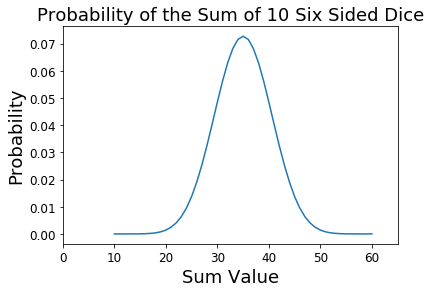

In [10]:
# Plot the distribution of 10 dices in a histogram
fig, ax = plt.subplots(1, 1) # create a figure
ax.plot(sums_10Dices, p_sum_10Dices) # fill the figure with the distribution
plt.tick_params(labelsize = 12) # sets tick parameter for the plot, in this case, the label size
locs, labels = xticks()  # Get the current locations and labels
plt.xlim([0,65]) # sets rage for x axis
ax.set_xlabel("Sum Value",fontsize = 18)
ax.set_ylabel("Probability", fontsize = 18)
plt.title("Probability of the Sum of 10 Six Sided Dice", fontsize = 18)
plt.show()

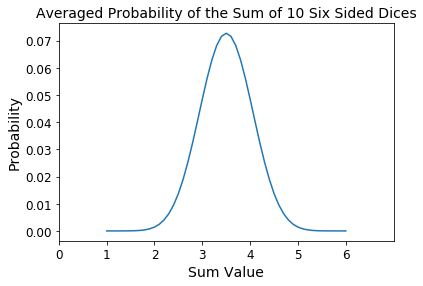

In [33]:
# graph the average of 10 dice

# rescale x axis
x_avg = sums_10Dices/10
s = x_avg.size

# Plot the distribution above in a histogram
fig, ax = plt.subplots(1, 1) # create a figure
ax.plot(x_avg, p_sum_10Dices) # fill the figure with the distribution
plt.tick_params(labelsize = 12) # sets tick parameter for the plot, in this case, the label size
locs, labels = xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 7, step=1))  # Set label locations.
plt.xlim([0,7]) # sets rage for x axis
ax.set_xlabel("Sum Value",fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
plt.title("Averaged Probability of the Sum of 10 Six Sided Dices", fontsize = 14)
plt.show()

What we have right now is not quite a Gaussian distribution. As we integrate over more dices, the average will look more and more like a Gaussian distribution according to the central limit theorem. 

### 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

The standard deviation of a Gaussian distribution gaus = 31.75267705249433


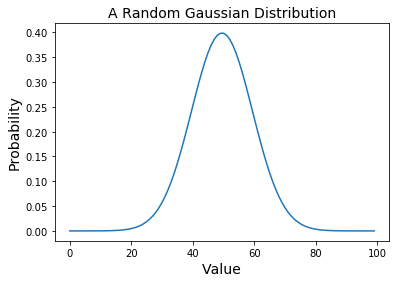

In [17]:
# Create a Gaussian distribution
gaus = stats.norm.rvs(loc = 5, size = 100)

# plot the Gaussian distribution
fig, ax = plt.subplots(1, 1) # create a figure
x = np.linspace(0, 10, 100)
gaus_pdf = stats.norm.pdf(x,loc = 5)
plt.plot(gaus_pdf);
ax.set_xlabel("Value",fontsize = 14);
ax.set_ylabel("Probability", fontsize = 14);
plt.title("A Random Gaussian Distribution", fontsize = 14);
left_x, right_x = plt.xlim()
x_gaus = np.linspace(left_x, right_x, gaus_pdf.size)

# Calculate the standard deviation of the distribution
std_gaus = np.std(x_gaus)
# print out the result
print("The standard deviation of a Gaussian distribution gaus = " + str(std_gaus))

The standard deviation of the sum of Gaussian distribution = 58.02588531856595


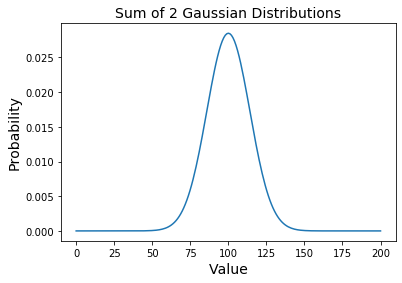

In [16]:
# calculate the sum of the gaussian using convolution
gaus_sum = np.convolve(gaus_pdf, gaus_pdf)
# normalize the pdf
gaus_sum = gaus_sum/gaus_sum.sum()

# plot the sum of Gaussian distributions
fig, ax = plt.subplots(1, 1) # create a figure
x_sum = np.linspace(0, 200, gaus_sum.size)
plt.plot(x_sum,gaus_sum);
ax.set_xlabel("Value",fontsize = 14);
ax.set_ylabel("Probability", fontsize = 14);
plt.title("Sum of 2 Gaussian Distributions", fontsize = 14);
# left_sum, right_sum = plt.xlim()
# x_sum = np.linspace(left_sum, right_sum, gaus_sum.size)

# Calculate the standard deviation of the distribution
std_sum = np.std(x_sum)
# print out the result
print("The standard deviation of the sum of Gaussian distribution = " + str(std_sum))

The plot above is the sum of the initial Gaussian distribution. We can see that this distribution is also a Gaussian.<br>

In the next cell, I will make the plot of the average of the initial Gaussian in the same plot with the original Gaussian for comparison. 

The standard deviation of the average of Gaussian distribution = 29.012942659282974


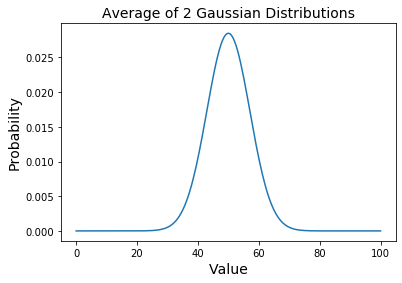

In [23]:
# plot the average of the gaussian distribution

# rescale the x axis
x_sum = np.linspace(0, 200, gaus_sum.size)
x_avg = x_sum / 2

fig, ax = plt.subplots(1, 1) # create a figure
# plot the average of Gaussian distributions
plt.plot(x_avg, gaus_sum);
ax.set_xlabel("Value",fontsize = 14);
ax.set_ylabel("Probability", fontsize = 14);
plt.title("Average of 2 Gaussian Distributions", fontsize = 14);

# Calculate the standard deviation of the average of Gaussian distribution
std_avg = np.std(x_avg)
# print out the result
print("The standard deviation of the average of Gaussian distribution = " + str(std_avg))

The figure above shows the original Gaussian distribution(the blue curve) and the average of Gaussian distribution (the orange curve) in the same plot for comparison.


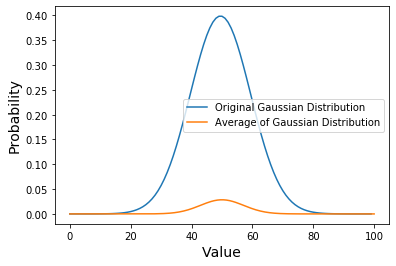

In [29]:
fig, ax = plt.subplots(1, 1) # create a figure
# plot the original Gaussian distribution
gaus_pdf = stats.norm.pdf(x,loc = 5)
plt.plot(gaus_pdf, label = "Original Gaussian Distribution");
# plot the average of Gaussian distributions
plt.plot(x_avg, gaus_sum, label = "Average of Gaussian Distribution");
plt.legend();
ax.set_xlabel("Value",fontsize = 14);
ax.set_ylabel("Probability", fontsize = 14);
print("The figure above shows the original Gaussian distribution(the blue curve) and the average of Gaussian distribution (the orange curve) in the same plot for comparison.")

From the plots above, we can see that the sum and average of an initially Gaussian distribution are also Guassian distributions. <br>
The standard deviation of the resulting sum is higher than the standard deviations of the original gaussian distribution, and the standard deviation of the resulting average is lower than the standard deviations of the original Gaussian distribution. <br>
This result makes sense. And as we integrate more and more distribution, we will get a wider and wider spread in the data distribution, which means a larger value for standard deviation. And as we average a distribution, the peak gets narrower and narrower, which gives us a smaller standard deviation value.